In [1]:
# 사용할 라이브러리 가져오기
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# 보스턴 집값 데이터 가져오기
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston_dataset = load_boston()

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# 보스턴 데이터세트 설명 출력
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# 보스턴 데이터세트의 Feature 목록 확인
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 데이터 속성 (Feature) 및 설명
<li> CRIM : 범죄율</li>
<li> INDUS : 비소매상업지역 면적 비율</li>
<li> NOX : 일산화질소 농도</li>
<li> RM : 주택당 방 수 </li>
<li> LSTAT : 인구 중 하위 계층 비율 </li>
<li> B : 인구 중 흑인 비율 </li>
<li> PTRATIO : 학생/교사 비율</li>
<li> ZN : 25,000 평방피트를 초과 거주지역 비율</li>
<li> CHAS : 찰스강의 경계에 위치 유무 (1은 위치, 0은 위치하지 않음)</li>
<li> AGE : 1940년 이전에 건축된 주택의 비율</li>
<li> RAD : 방사형 고속도로까지의 거리</li>
<li> DIS : 직업센터의 거리</li>
<li> TAX : 재산세율</li>
<li> MEDV : 본인 소유의 주택가격(중앙값) (단위:$1,000)</li>

In [6]:
# 보스턴 데이터세트를 DataFrame 형식으로 변환
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [7]:
# Target variable "MEDV" 가 없기 때문에 생성해주어야 함
boston['MEDV'] = boston_dataset.target

In [8]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# 데이터 전처리

In [9]:
# NULL값이 포함된 Feature 확인
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# 데이터 탐색

### MEDV(주택 가격) 분포

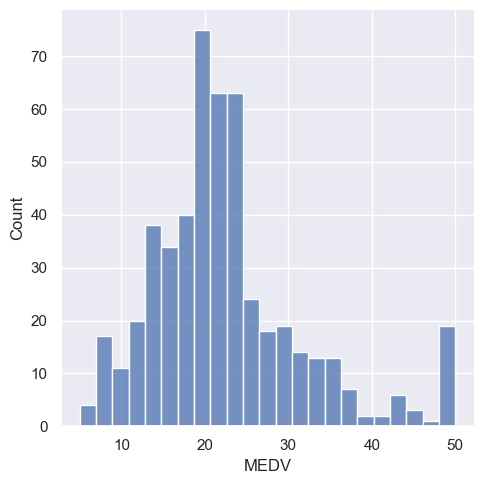

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(boston['MEDV'])
plt.show()

# Visualization & Observation
Regression model을 만들기 위해 Target 변수"MEDV"와 높은 상관관계를 갖는 Feature를 선택함

<AxesSubplot:>

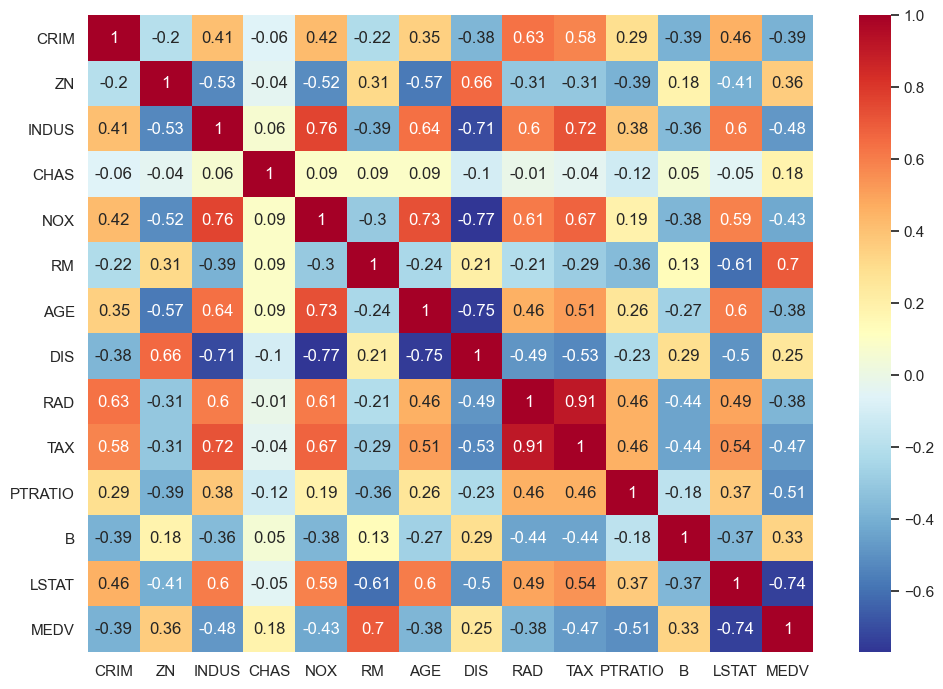

In [11]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlBu_r',)

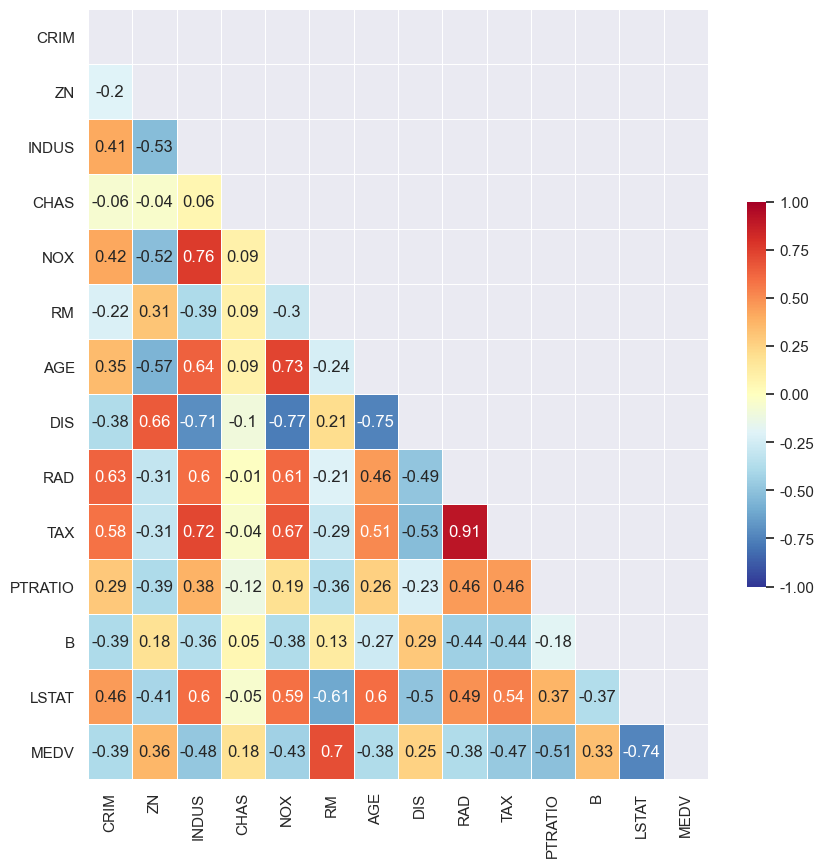

In [23]:
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

* MEDV는 LSTAT와 강한 음의 상관 관계가 있고, RM과 강한 양의 상관 관계가 있음
* 다중공선성(Multicollinearity) : 독립변수들이 강한 선형관계를 가지고 있는 형태
* 다중공선성을 갖는 변수는 회귀계수의 표준오차를 증가시키고, 회귀 계수를 불안정하게 함
*RAD<->TAX (0.91),  DIS<->AGE(-0.75)

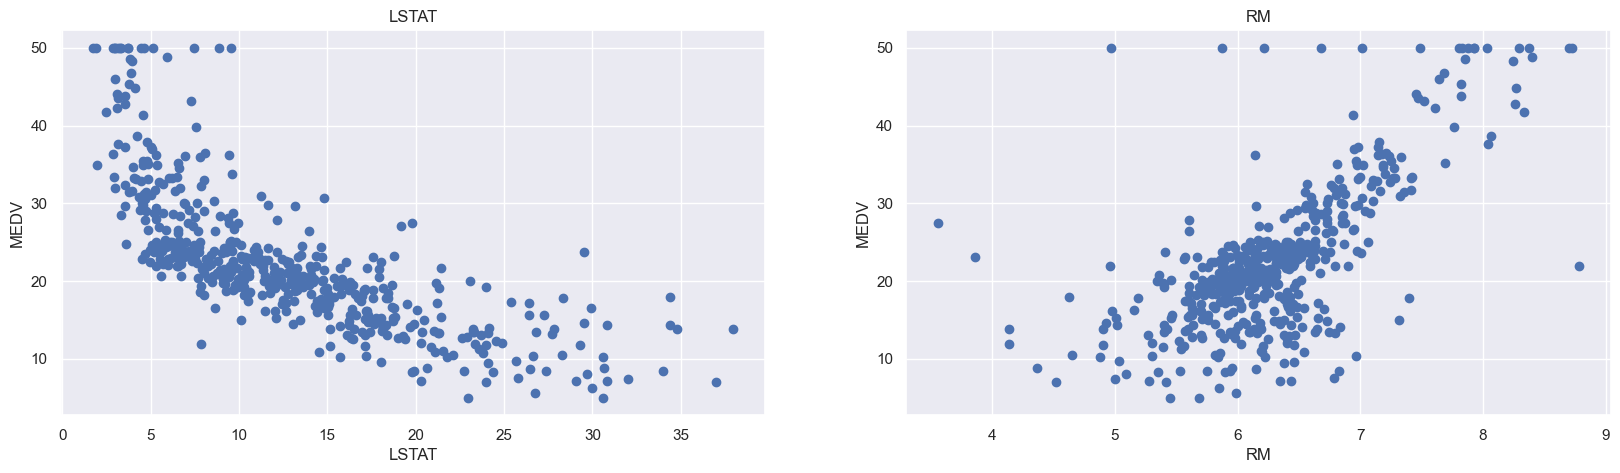

In [13]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# 데이터 시각화 리포트 툴

In [14]:
import pandas_profiling
import matplotlib
from matplotlib import font_manager, rc
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

# 레포트 생성 --> html 파일로 저장하기
report = boston.profile_report()
report.to_file('boston_report.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT', 'RM'])
Y = boston['MEDV']

In [16]:
RANDOM_SEED = 5
SPLIT_SIZE = 0.2

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = SPLIT_SIZE, random_state=RANDOM_SEED)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# 모델 학습 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# 모델 검증

In [19]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


In [20]:
lin_model.coef_

array([-0.71722954,  4.58938833])

In [21]:
lin_model.intercept_

2.73624034260661

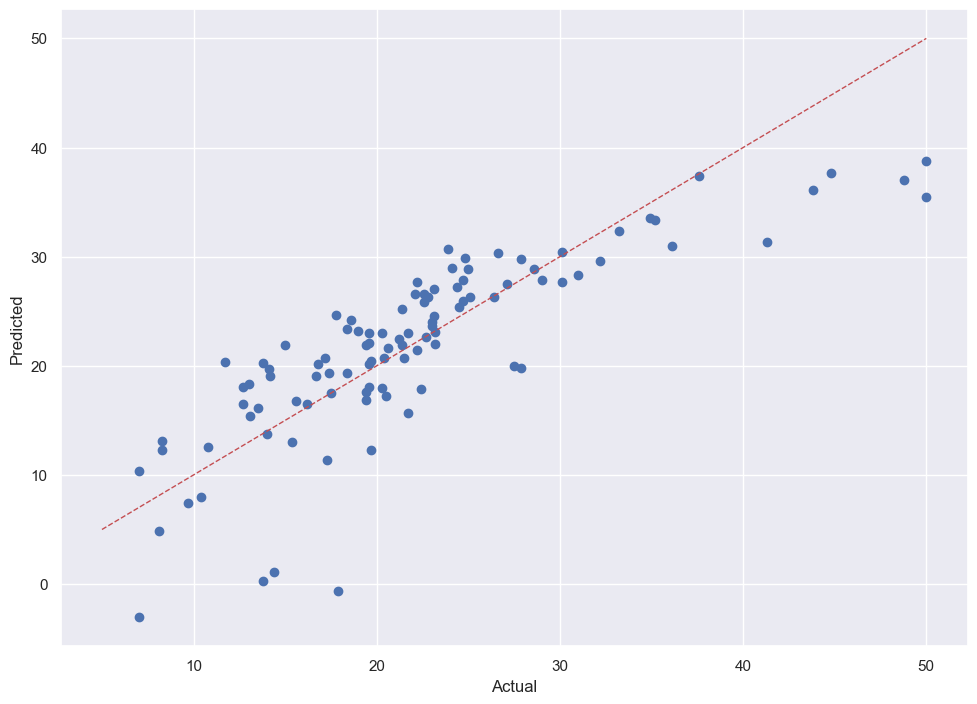

In [22]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_test_predict)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
plt.show()